In [1]:
from heatgeo.embedding import HeatGeo
import numpy as np
import scprep
import scanpy as sc

In [2]:
adata = sc.read('../data/old/eb_hv.h5ad', backed='r')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
data = np.load('../data/old/eb_hv_pca_subset.npy')

In [4]:
data_phate = np.load('../data/old/eb_hv_pca_subset_phate.npy')

In [5]:
emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(data)

Using s_gd2 for MDS. None


In [13]:
np.random.seed(42)
subset_id = np.random.choice(adata.shape[0], size=3000, replace=False)
colors = adata.obs['sample_labels'][subset_id]
colors = colors.to_numpy()

In [7]:
# colors.to_csv('../data/eb_hv_pca_subset_colors.csv', index=True)

<Axes: >

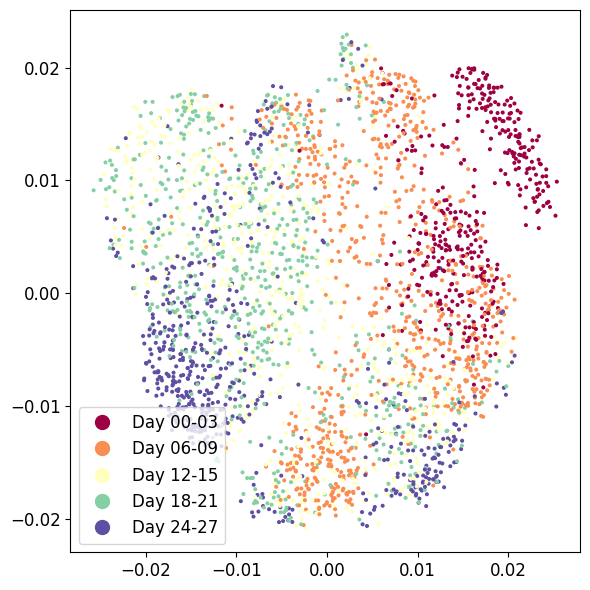

In [14]:
scprep.plot.scatter2d(emb, c=colors, figsize=(6, 6), cmap='Spectral')

<Axes: >

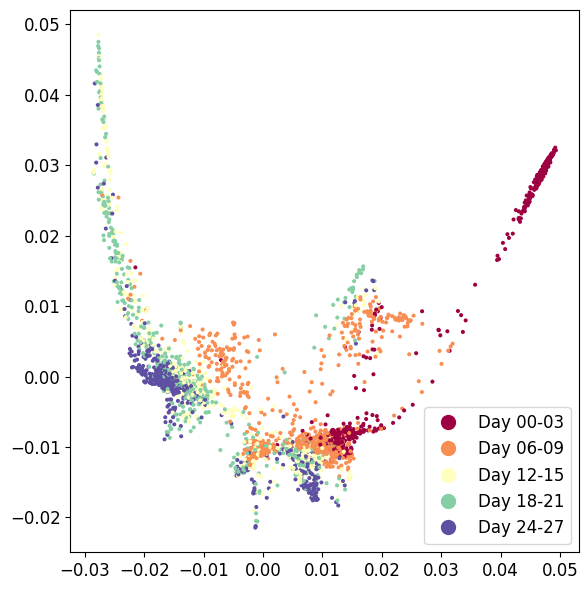

In [15]:
scprep.plot.scatter2d(data_phate, c=colors, figsize=(6, 6), cmap='Spectral')

In [9]:
# np.save('../data/eb_hv_pca_subset_heatgeo.npy', emb)

In [18]:
emb_op.metric_computation(data)

In [20]:
emb_op.dist

(3000, 3000)

In [21]:
np.savez('../data/eb_subset_heatgeo.npz', data=data, phate=emb, dist=emb_op.dist, colors=colors)